<a href="https://colab.research.google.com/github/zoribecca/Python-Practice-Project/blob/main/3MTT_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## COVID-19 PROJECT

## Project Phases

1. Problem Statement
2. Data Acquisition
3. Preliminary Data Analysis
4. Data Inspection and Cleaning
5. EDA
6. Data Preprocessing
7. Building the Model
8. Building Time Series Model





### 1. Problem Statement

One of the biggest challenges faced by the Public Health Organization is how to effectively allocate health resources such as vaccines, quarantine facilities and medical staffs and make informed policies to prevent future outbreaks of Covid_19. This requires understanding the various factors responsible for the spread of the virus.

### Research Questions
The project is set to answer the following research questions:
1. What are the factors responsible for the spread of Covid_19?
2. How does the spread differ among countries/regions?
3. What predictive modeling system will be used to anticipate and prevent future outbreak?


### Project Objectives
The broad objective of this project is to develop a predictive model that provide insights into the factors responsible for the spread of Covid_19, thereby aiding Piblic Health Organization to allocate resources equitably and formulate policies to prevent future outbreaks.

Specifically, the project seek to:
1. To identify key factoors responsible for the spread of Covid_19.
2. To examine and compare the virus spread among differnt countries/regions.
3. To develop predictive modeling system that can anticipate and prevent future outbreaks.


### 2. Data Acquisition

###### Task 2.1 Download

###### Download the dataset [here](https://www.kaggle.com/datasets/imdevskp/corona-virus-report)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from statsmodels.tsa.arima.model import ARIMA

###### Task 2.2 Load Data into Pandas DataFrame

In [3]:
# Load in the dataset
usa_wise = pd.read_csv("/content/drive/MyDrive/3MTT WORKS/Data Science Projects/3MTT Project Dataset/usa_county_wise.csv")
worldometer = pd.read_csv("/content/drive/MyDrive/3MTT WORKS/Data Science Projects/3MTT Project Dataset/worldometer_data.csv")
country_wise = pd.read_csv("/content/drive/MyDrive/3MTT WORKS/Data Science Projects/3MTT Project Dataset/country_wise_latest.csv")
covid_19 = pd.read_csv("/content/drive/MyDrive/3MTT WORKS/Data Science Projects/3MTT Project Dataset/covid_19_clean_complete.csv")
day_wise = pd.read_csv("/content/drive/MyDrive/3MTT WORKS/Data Science Projects/3MTT Project Dataset/day_wise.csv")
full_grouped = pd.read_csv("/content/drive/MyDrive/3MTT WORKS/Data Science Projects/3MTT Project Dataset/full_grouped.csv")

# Rename the Country/Region column
usa_wise.rename(columns={'Country_Region': 'Country'}, inplace=True)
worldometer.rename(columns={'Country/Region': 'Country'}, inplace=True)
country_wise.rename(columns={'Country/Region': 'Country'}, inplace=True)
covid_19.rename(columns={'Country/Region': 'Country'}, inplace=True)
day_wise.rename(columns={'Country/Region': 'Country'}, inplace=True)
full_grouped.rename(columns={'Country/Region': 'Country'}, inplace=True)


In [4]:
usa_wise.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",1/22/20,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",1/22/20,0,0
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",1/22/20,0,0
3,63072001,PR,PRI,630,72001.0,Adjuntas,Puerto Rico,US,18.180117,-66.754367,"Adjuntas, Puerto Rico, US",1/22/20,0,0
4,63072003,PR,PRI,630,72003.0,Aguada,Puerto Rico,US,18.360255,-67.175131,"Aguada, Puerto Rico, US",1/22/20,0,0


In [5]:
worldometer.head()

,Country,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [6]:
country_wise.head()

,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [7]:
covid_19.head()

,Province/State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [8]:
day_wise.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [9]:
full_grouped.head()

,Date,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [10]:
usa_wise.shape

(627920, 14)

In [11]:
worldometer.shape

(209, 16)

In [12]:
country_wise.shape

(187, 15)

In [13]:
covid_19.shape

(49068, 10)

In [14]:
day_wise.shape

(188, 12)

In [15]:
full_grouped.shape

(35156, 10)

In [16]:
covid_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country         49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [17]:
# Convert the date column to datetime
covid_19['Date'] = pd.to_datetime(covid_19['Date'])

In [18]:
# Check
covid_19.dtypes

,0
Province/State,object
Country,object
Lat,float64
Long,float64
Date,datetime64[ns]
Confirmed,int64
Deaths,int64
Recovered,int64
Active,int64
WHO Region,object


In [19]:
covid_19.isna().sum()

,0
Province/State,34404
Country,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


In [20]:
day_wise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    188 non-null    object 
 1   Confirmed               188 non-null    int64  
 2   Deaths                  188 non-null    int64  
 3   Recovered               188 non-null    int64  
 4   Active                  188 non-null    int64  
 5   New cases               188 non-null    int64  
 6   New deaths              188 non-null    int64  
 7   New recovered           188 non-null    int64  
 8   Deaths / 100 Cases      188 non-null    float64
 9   Recovered / 100 Cases   188 non-null    float64
 10  Deaths / 100 Recovered  188 non-null    float64
 11  No. of countries        188 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 17.8+ KB


In [21]:
# convert the date column to datetime
day_wise['Date'] = pd.to_datetime(day_wise['Date'])

In [22]:
# Check
day_wise.dtypes

,0
Date,datetime64[ns]
Confirmed,int64
Deaths,int64
Recovered,int64
Active,int64
New cases,int64
New deaths,int64
New recovered,int64
Deaths / 100 Cases,float64
Recovered / 100 Cases,float64


In [23]:
# Check for mising values
day_wise.isna().sum()

,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
New cases,0
New deaths,0
New recovered,0
Deaths / 100 Cases,0
Recovered / 100 Cases,0


In [24]:
full_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           35156 non-null  object
 1   Country        35156 non-null  object
 2   Confirmed      35156 non-null  int64 
 3   Deaths         35156 non-null  int64 
 4   Recovered      35156 non-null  int64 
 5   Active         35156 non-null  int64 
 6   New cases      35156 non-null  int64 
 7   New deaths     35156 non-null  int64 
 8   New recovered  35156 non-null  int64 
 9   WHO Region     35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


In [25]:
# Convert the date column to datetime
full_grouped['Date'] = pd.to_datetime(full_grouped['Date'])

In [26]:
# Check
full_grouped.dtypes

,0
Date,datetime64[ns]
Country,object
Confirmed,int64
Deaths,int64
Recovered,int64
Active,int64
New cases,int64
New deaths,int64
New recovered,int64
WHO Region,object


In [27]:
full_grouped.isna().sum()

,0
Date,0
Country,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
New cases,0
New deaths,0
New recovered,0
WHO Region,0


### 3. Data Preparation

###### Task 3.1 Handle Missing Values

In [28]:
# Replace missing values with 'Unknown' in covid_19 dataset
covid_19.fillna('Unknown', inplace=True)
covid_19.isna().sum()

,0
Province/State,0
Country,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


In [29]:
# Check
covid_19.head()

,Province/State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Unknown,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Unknown,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,Unknown,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,Unknown,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,Unknown,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


###### Task 3.2 Data cleaning and preprocessing


In [30]:
# Merge country_wise, covid_19 and full_grouped on 'Country'
country_wise_subset = country_wise[['Country', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered']]
covid_19_subset = covid_19[['Country', 'Lat', 'Long']]

# Merge the DataFrames based on the 'Country' colum
combined_data = full_grouped.merge(country_wise_subset, on='Country', how='left', suffixes = ('_grouped', '_country')) \
                 .merge(covid_19_subset, on='Country', how='left')


# Check the combined dataset
combined_data.head()



,Date,Country,Confirmed_grouped,Deaths_grouped,Recovered_grouped,Active_grouped,New cases_grouped,New deaths_grouped,New recovered_grouped,WHO Region,Confirmed_country,Deaths_country,Recovered_country,Active_country,New cases_country,New deaths_country,New recovered_country,Lat,Long
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,36263,1269,25198,9796,106,10,18,33.93911,67.709953
1,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,36263,1269,25198,9796,106,10,18,33.93911,67.709953
2,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,36263,1269,25198,9796,106,10,18,33.93911,67.709953
3,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,36263,1269,25198,9796,106,10,18,33.93911,67.709953
4,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,36263,1269,25198,9796,106,10,18,33.93911,67.709953


In [31]:
combined_data.shape

(9224784, 19)

In [32]:
#Check for missing values
combined_data.isna().sum()

,0
Date,0
Country,0
Confirmed_grouped,0
Deaths_grouped,0
Recovered_grouped,0
Active_grouped,0
New cases_grouped,0
New deaths_grouped,0
New recovered_grouped,0
WHO Region,0


In [33]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9224784 entries, 0 to 9224783
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Country                object        
 2   Confirmed_grouped      int64         
 3   Deaths_grouped         int64         
 4   Recovered_grouped      int64         
 5   Active_grouped         int64         
 6   New cases_grouped      int64         
 7   New deaths_grouped     int64         
 8   New recovered_grouped  int64         
 9   WHO Region             object        
 10  Confirmed_country      int64         
 11  Deaths_country         int64         
 12  Recovered_country      int64         
 13  Active_country         int64         
 14  New cases_country      int64         
 15  New deaths_country     int64         
 16  New recovered_country  int64         
 17  Lat                    float64       
 18  Long                  

###### Task 3.3 Feature engineering

In [34]:
# Create columns for year, month, day, week, and quarters
combined_data["Year"] = combined_data["Date"].dt.year
combined_data["Month"] = combined_data["Date"].dt.month_name()
combined_data["Day"] = combined_data["Date"].dt.day_name()
combined_data['Week'] = combined_data['Date'].dt.isocalendar().week
combined_data["Quarter"] = combined_data["Date"].dt.quarter

In [35]:
combined_data.head(10)

,Date,Country,Confirmed_grouped,Deaths_grouped,Recovered_grouped,Active_grouped,New cases_grouped,New deaths_grouped,New recovered_grouped,WHO Region,...,New cases_country,New deaths_country,New recovered_country,Lat,Long,Year,Month,Day,Week,Quarter
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,...,106,10,18,33.93911,67.709953,2020,January,Wednesday,4,1
1,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,...,106,10,18,33.93911,67.709953,2020,January,Wednesday,4,1
2,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,...,106,10,18,33.93911,67.709953,2020,January,Wednesday,4,1
3,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,...,106,10,18,33.93911,67.709953,2020,January,Wednesday,4,1
4,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,...,106,10,18,33.93911,67.709953,2020,January,Wednesday,4,1
5,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,...,106,10,18,33.93911,67.709953,2020,January,Wednesday,4,1
6,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,...,106,10,18,33.93911,67.709953,2020,January,Wednesday,4,1
7,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,...,106,10,18,33.93911,67.709953,2020,January,Wednesday,4,1
8,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,...,106,10,18,33.93911,67.709953,2020,January,Wednesday,4,1
9,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,...,106,10,18,33.93911,67.709953,2020,January,Wednesday,4,1


In [36]:
combined_data.columns

Index(['Date', 'Country', 'Confirmed_grouped', 'Deaths_grouped',
       'Recovered_grouped', 'Active_grouped', 'New cases_grouped',
       'New deaths_grouped', 'New recovered_grouped', 'WHO Region',
       'Confirmed_country', 'Deaths_country', 'Recovered_country',
       'Active_country', 'New cases_country', 'New deaths_country',
       'New recovered_country', 'Lat', 'Long', 'Year', 'Month', 'Day', 'Week',
       'Quarter'],
      dtype='object')

In [37]:
# Validate that Confirmed_grouped matches the sum of Active, Deaths, and Recovered
check = combined_data['Active_grouped'] + combined_data['Deaths_grouped'] + combined_data['Recovered_grouped']
is_valid = (combined_data['Confirmed_grouped'] == check).all()

print(f"Is the Confirmed_grouped column accurate? {is_valid}")

# Validate that Confirmed_country matches the sum of Active, Deaths, and Recovered
check2 = combined_data['Active_country'] + combined_data['Deaths_country'] + combined_data['Recovered_country']
is_valid2 = (combined_data['Confirmed_country'] == check2).all()

print(f"Is the Confirmed_country column accurate? {is_valid2}")


Is the Confirmed_grouped column accurate? True
Is the Confirmed_country column accurate? True


 Hence, the confirmed column represent the total cases recorded.

In [38]:
combined_data['Country'].nunique()

187

In [39]:
# Create columns for the following to get more insights from the dataset
combined_data['Mortality Rate %'] = (combined_data['Deaths_grouped'] / combined_data['Confirmed_grouped'] * 100).fillna(0)
combined_data['Recovery Rate %'] = (combined_data['Recovered_grouped'] / combined_data['Confirmed_grouped'] * 100).fillna(0)
combined_data['Active Proportion %'] = (combined_data['Active_grouped'] / combined_data['Confirmed_grouped'] * 100).fillna(0)
combined_data.tail()

,Date,Country,Confirmed_grouped,Deaths_grouped,Recovered_grouped,Active_grouped,New cases_grouped,New deaths_grouped,New recovered_grouped,WHO Region,...,Lat,Long,Year,Month,Day,Week,Quarter,Mortality Rate %,Recovery Rate %,Active Proportion %
9224779,2020-07-27,Zimbabwe,2704,36,542,2126,192,2,24,Africa,...,-19.015438,29.154857,2020,July,Monday,31,3,1.331361,20.044379,78.62426
9224780,2020-07-27,Zimbabwe,2704,36,542,2126,192,2,24,Africa,...,-19.015438,29.154857,2020,July,Monday,31,3,1.331361,20.044379,78.62426
9224781,2020-07-27,Zimbabwe,2704,36,542,2126,192,2,24,Africa,...,-19.015438,29.154857,2020,July,Monday,31,3,1.331361,20.044379,78.62426
9224782,2020-07-27,Zimbabwe,2704,36,542,2126,192,2,24,Africa,...,-19.015438,29.154857,2020,July,Monday,31,3,1.331361,20.044379,78.62426
9224783,2020-07-27,Zimbabwe,2704,36,542,2126,192,2,24,Africa,...,-19.015438,29.154857,2020,July,Monday,31,3,1.331361,20.044379,78.62426


### 4. KPIs & Insights

###### 4.1. Total Confirmed Cases by WHO Region

Total Confirmed Cases by WHO Region is:               WHO Region  Total_Confirmed
0                 Africa       4096863476
1               Americas      94974451940
2  Eastern Mediterranean      13927583696
3                 Europe     140113288412
4        South-East Asia      10362252620
5        Western Pacific      91240198352


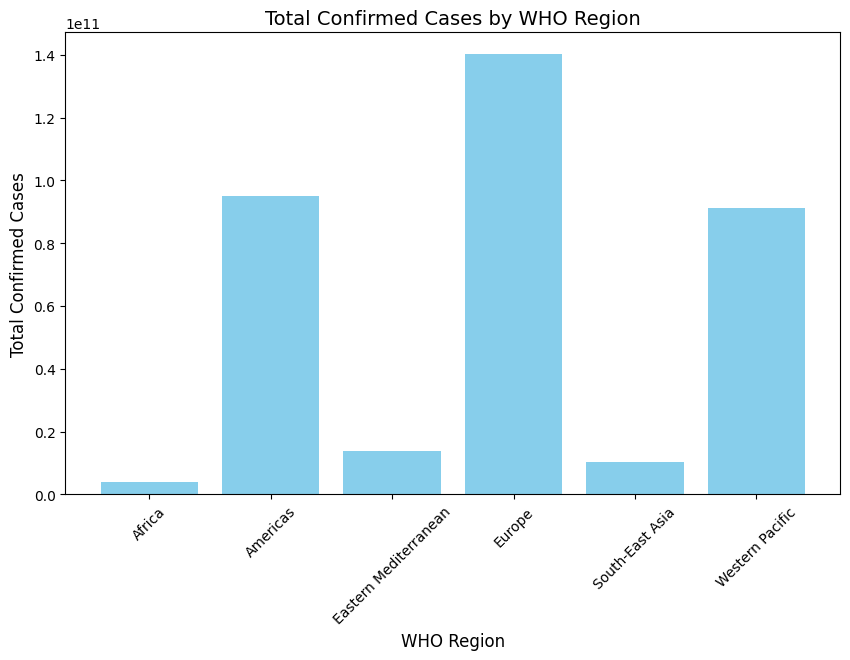

In [40]:
# KPI
TCC_by_WHO = combined_data.groupby('WHO Region').agg(Total_Confirmed=('Confirmed_grouped', 'sum')).reset_index()
print(f"Total Confirmed Cases by WHO Region is: {TCC_by_WHO}")

# Insight
plt.figure(figsize=(10, 6))
plt.bar(TCC_by_WHO['WHO Region'], TCC_by_WHO['Total_Confirmed'], color='skyblue')
plt.title('Total Confirmed Cases by WHO Region', fontsize=14)
plt.xlabel('WHO Region', fontsize=12)
plt.ylabel('Total Confirmed Cases', fontsize=12)
plt.xticks(rotation=45)
plt.show()


###### 4.2. Total Active Cases By WHO Region

Total Active Cases by WHO Region is:               WHO Region  Total_Active
0                 Africa    1909726372
1               Americas   60359147084
2  Eastern Mediterranean    4532334080
3                 Europe   85770968904
4        South-East Asia    4442421952
5        Western Pacific   13537069908


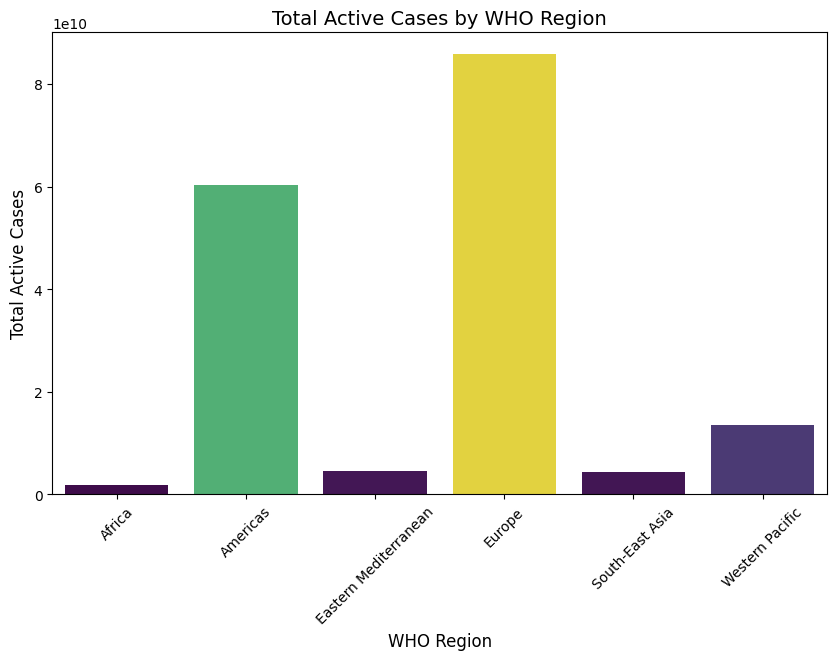

In [41]:
# KPI
TAC_by_WHO = combined_data.groupby(['WHO Region']).agg(Total_Active=('Active_grouped', 'sum')).reset_index()
print(f"Total Active Cases by WHO Region is: {TAC_by_WHO}")

# Insight
plt.figure(figsize=(10, 6))
sns.barplot(x='WHO Region', y='Total_Active', hue='Total_Active', data=TAC_by_WHO, palette='viridis', legend = False)
plt.title('Total Active Cases by WHO Region', fontsize=14)
plt.xlabel('WHO Region', fontsize=12)
plt.ylabel('Total Active Cases', fontsize=12)
plt.xticks(rotation=45)
plt.show()

###### 4.3. Active Proportion by WHO

Active Proportion by WHO Region:               WHO Region  Active Proportion %
1               Americas            54.838447
3                 Europe            50.740811
4        South-East Asia            49.177713
2  Eastern Mediterranean            47.043648
0                 Africa            42.553094
5        Western Pacific            28.621017


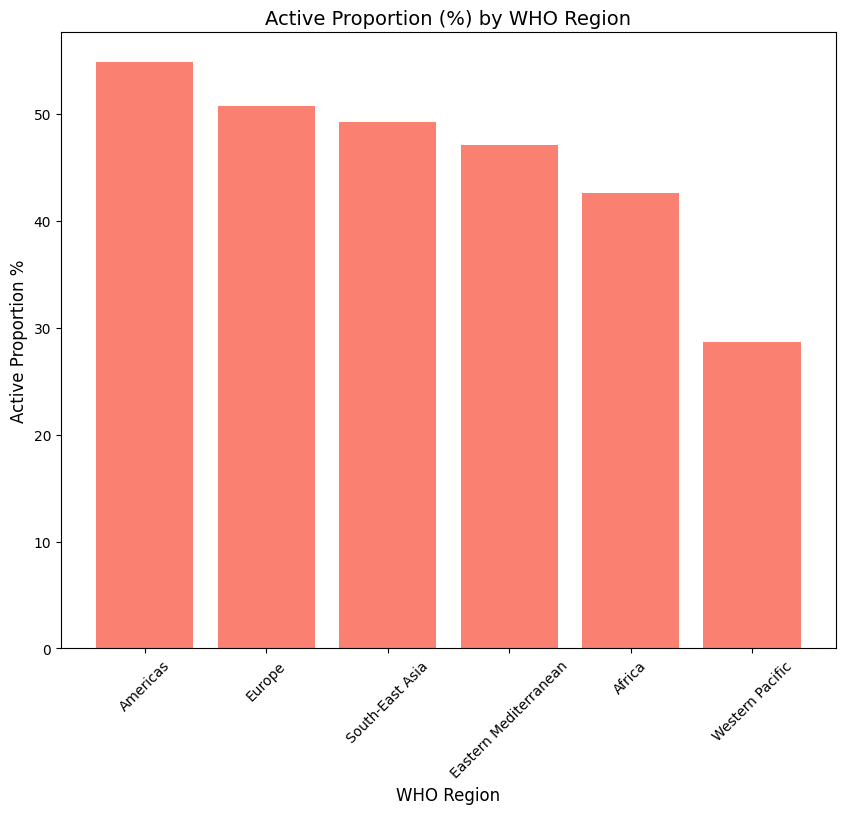

In [42]:
# KPI
# Active Proportion by WHO Region
# Grouping data by WHO Region
active_data = combined_data.groupby('WHO Region')[['Active Proportion %']].agg('mean').reset_index()

# Sort by recovery rate
active_data = active_data.sort_values(by='Active Proportion %', ascending=False)
print(f"Active Proportion by WHO Region: {active_data}")

# Insight
plt.figure(figsize=(10, 8))
plt.bar(active_data['WHO Region'], active_data['Active Proportion %'], color='salmon')
plt.title('Active Proportion (%) by WHO Region', fontsize=14)
plt.xlabel('WHO Region', fontsize=12)
plt.ylabel('Active Proportion %', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


###### 4.4. Active Proportion by Country

Top 10 Countries by Active Proportion:             Country  Active Proportion %
32           Canada            93.511784
161          Sweden            88.950637
177  United Kingdom            82.727843
173              US            79.422237
120     Netherlands            72.633112
133     Philippines            68.179138
168     Timor-Leste            68.085106
117      Mozambique            67.866128
76         Honduras            64.826751
0       Afghanistan            64.534760


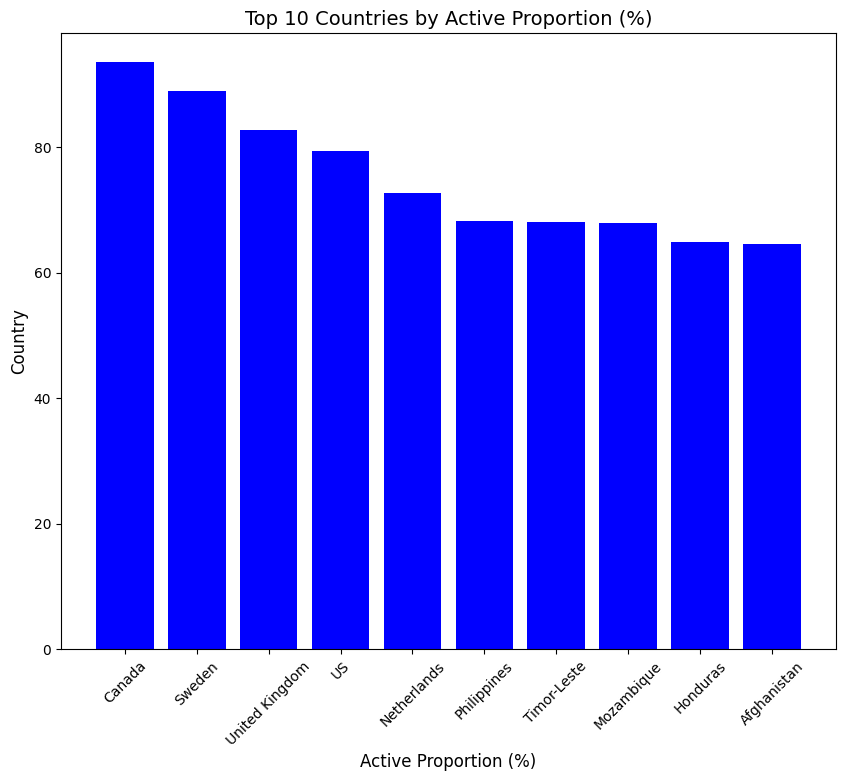

In [43]:
# KPI
# Aggregate Active Proportion by country
country_aggregates = combined_data.groupby('Country')[['Active Proportion %']].agg('mean').reset_index()

# Sort by Active Proportion
top10_countries = country_aggregates.nlargest(10, 'Active Proportion %')
print(f"Top 10 Countries by Active Proportion: {top10_countries}")

# Insight
plt.figure(figsize=(10, 8))
plt.bar(top10_countries['Country'], top10_countries['Active Proportion %'], color='blue')
plt.title('Top 10 Countries by Active Proportion (%)', fontsize=14)
plt.xlabel('Active Proportion (%)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(rotation=45)
plt.show()


###### 4.5. Total Recovered Cases by WHO Region

Total Recovered Cases by WHO Region is:               WHO Region  Total_Recovered
0                 Africa       2104421240
1               Americas      29529055472
2  Eastern Mediterranean       9033532164
3                 Europe      37109943596
4        South-East Asia       5645701476
5        Western Pacific      73467609704


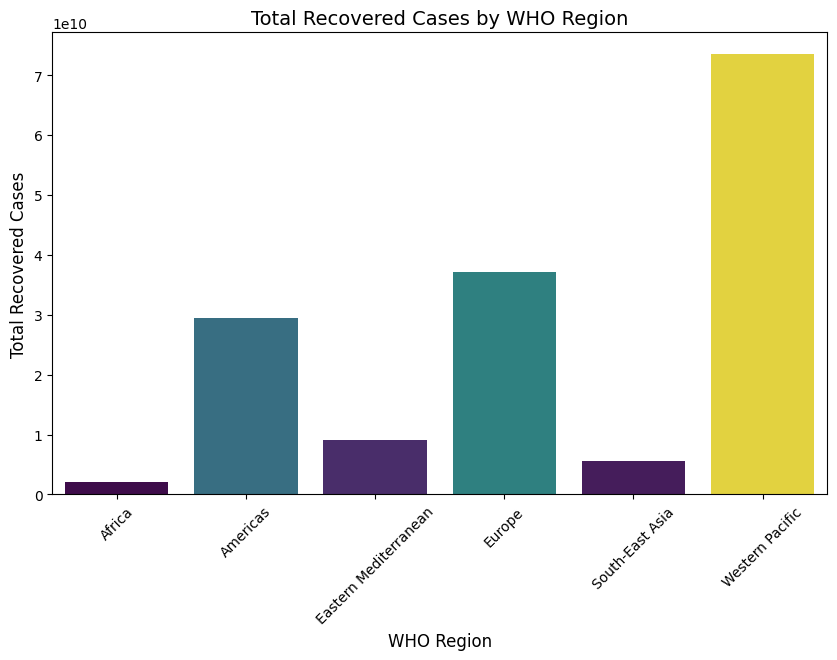

In [44]:
# KPI
TRC_by_WHO = combined_data.groupby(['WHO Region']).agg(Total_Recovered=('Recovered_grouped', 'sum')).reset_index()
print(f"Total Recovered Cases by WHO Region is: {TRC_by_WHO}")

# Insight
plt.figure(figsize=(10, 6))
sns.barplot(x='WHO Region', y='Total_Recovered', hue='Total_Recovered', data=TRC_by_WHO, palette='viridis', legend = False)
plt.title('Total Recovered Cases by WHO Region', fontsize=14)
plt.xlabel('WHO Region', fontsize=12)
plt.ylabel('Total Recovered Cases', fontsize=12)
plt.xticks(rotation=45)
plt.show()


###### 4.6. Recovery Rates by WHO Region

Recovery Rate by WHO Region:               WHO Region  Recovery Rate %
5        Western Pacific        64.690780
4        South-East Asia        32.602970
3                 Europe        28.890723
2  Eastern Mediterranean        28.756952
0                 Africa        24.883316
1               Americas        22.391525


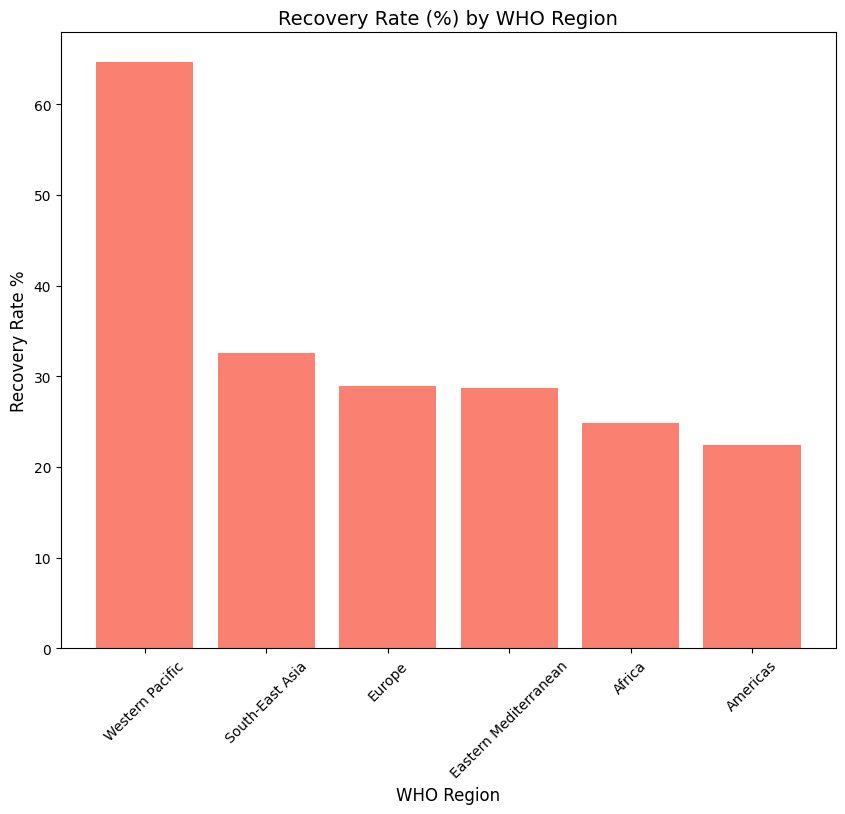

In [45]:
# KPI
# Recovery Rates by WHO Region
# Grouping data by WHO Region
recovery_data = combined_data.groupby('WHO Region')[['Recovery Rate %']].agg('mean').reset_index()

# Sort by recovery rate
recovery_data = recovery_data.sort_values(by='Recovery Rate %', ascending=False)
print(f"Recovery Rate by WHO Region: {recovery_data}")

# Insight
plt.figure(figsize=(10, 8))
plt.bar(recovery_data['WHO Region'], recovery_data['Recovery Rate %'], color='salmon')
plt.title('Recovery Rate (%) by WHO Region', fontsize=14)
plt.xlabel('WHO Region', fontsize=12)
plt.ylabel('Recovery Rate %', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()



###### 4.7. Recovery Rate by Country

Top 10 Countries by Recovery Rate:            Country  Recovery Rate %
36           China        73.426132
30        Cambodia        70.416266
167       Thailand        67.041067
181        Vietnam        66.566557
100  Liechtenstein        63.582219
68       Greenland        60.655665
155    South Korea        58.386514
24          Brunei        58.105005
105       Malaysia        58.006278
8        Australia        57.249149


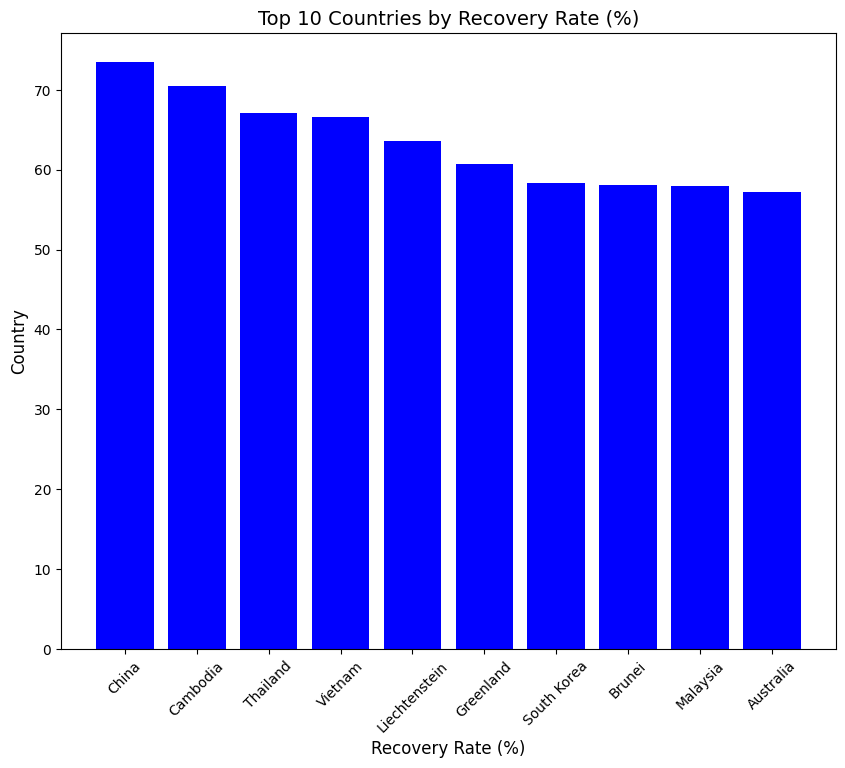

In [46]:
# KPI
# Aggregate Recovery rate by country
country_aggregates2 = combined_data.groupby('Country')[['Recovery Rate %']].agg('mean').reset_index()

# Sort by Recovery rate
top10_countries2 = country_aggregates2.nlargest(10, 'Recovery Rate %')
print(f"Top 10 Countries by Recovery Rate: {top10_countries2}")

# Insight
plt.figure(figsize=(10, 8))
plt.bar(top10_countries2['Country'], top10_countries2['Recovery Rate %'], color='blue')
plt.title('Top 10 Countries by Recovery Rate (%)', fontsize=14)
plt.xlabel('Recovery Rate (%)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(rotation=45)
plt.show()


###### 4.8. Total Deaths by WHO Region

Total Deaths by WHO Region is:               WHO Region  Total_Deaths
0                 Africa      82715864
1               Americas    5086249384
2  Eastern Mediterranean     361717452
3                 Europe   17232375912
4        South-East Asia     274129192
5        Western Pacific    4235518740


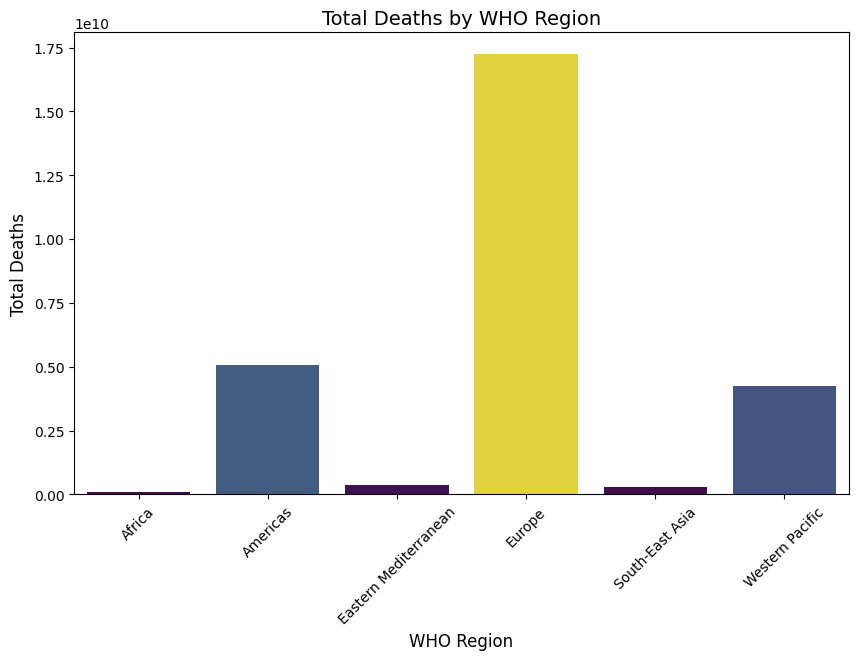

In [47]:
# KPI
TD_by_WHO = combined_data.groupby(['WHO Region']).agg(Total_Deaths=('Deaths_grouped', 'sum')).reset_index()
print(f"Total Deaths by WHO Region is: {TD_by_WHO}")

# Insight
plt.figure(figsize=(10, 6))
sns.barplot(x='WHO Region', y='Total_Deaths', hue='Total_Deaths', data=TD_by_WHO, palette='viridis', legend = False)
plt.title('Total Deaths by WHO Region', fontsize=14)
plt.xlabel('WHO Region', fontsize=12)
plt.ylabel('Total Deaths', fontsize=12)
plt.xticks(rotation=45)
plt.show()

###### 4.9. Mortality Rate by WHO

WHO Region by Mortality Rate:               WHO Region  Mortality Rate %
3                 Europe          4.829902
1               Americas          3.308881
5        Western Pacific          3.216250
2  Eastern Mediterranean          2.608492
0                 Africa          2.033892
4        South-East Asia          1.357615


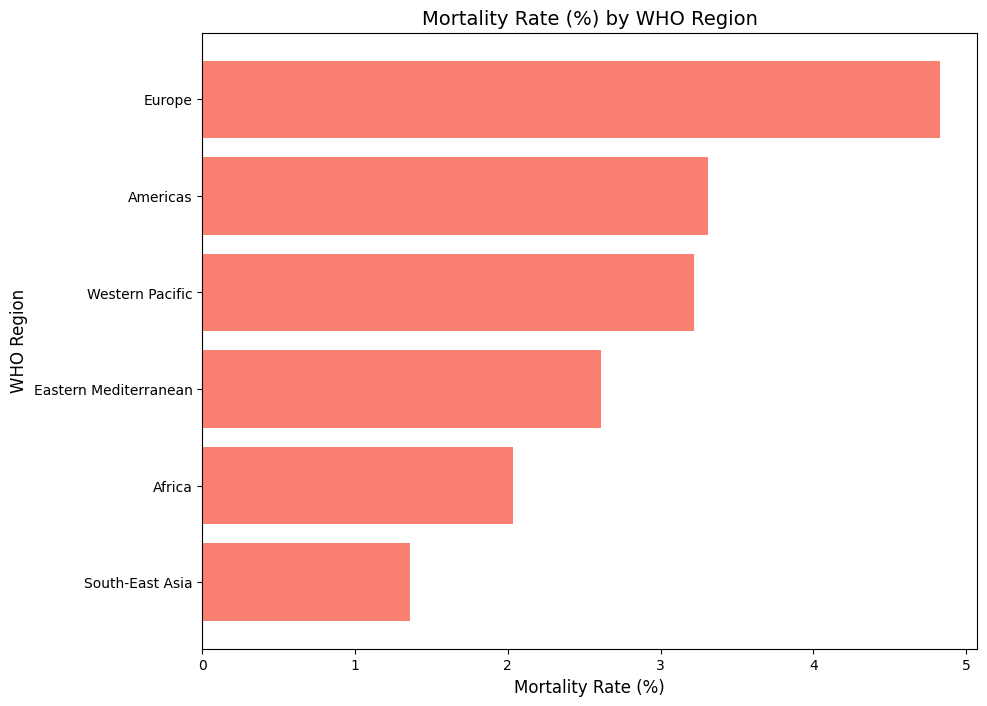

In [48]:
# Mortality Rate by WHO Region
# Aggregate mortality rate by WHO Region
WHO_aggregates = combined_data.groupby('WHO Region')[['Mortality Rate %']].agg('mean').reset_index()

# Sort by mortality rate
sorted_region = WHO_aggregates.nlargest(10, 'Mortality Rate %')
print(f"WHO Region by Mortality Rate: {sorted_region}")

# Insight
plt.figure(figsize=(10, 8))
plt.barh(sorted_region['WHO Region'], sorted_region['Mortality Rate %'], color='salmon')
plt.title('Mortality Rate (%) by WHO Region', fontsize=14)
plt.xlabel('Mortality Rate (%)', fontsize=12)
plt.ylabel('WHO Region', fontsize=12)
plt.gca().invert_yaxis()
plt.show()


###### 4.10. Mortality Rate by Country

Top 10 Countries by Mortality Rate:             Country  Mortality Rate %
184           Yemen         11.184522
159           Sudan         10.357696
133     Philippines         10.345289
61           France         10.124110
85            Italy         10.119833
16          Belgium          9.681450
177  United Kingdom          9.533477
73           Guyana          8.388045
122       Nicaragua          8.065478
120     Netherlands          8.018745


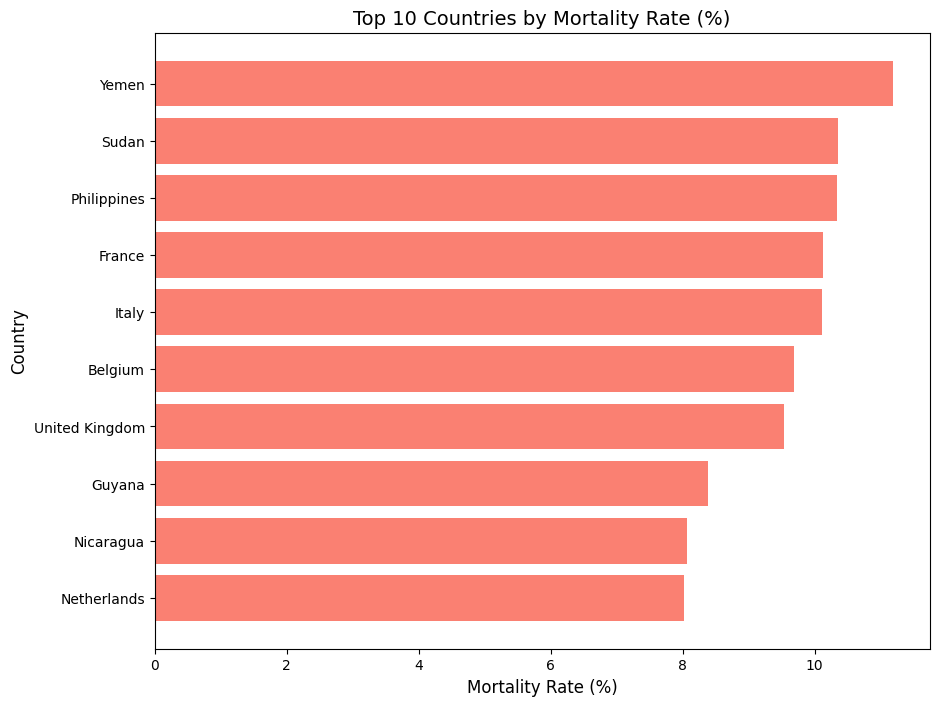

In [49]:
# KPI
# Aggregate mortality rate by country
country_aggregates3 = combined_data.groupby('Country')[['Mortality Rate %']].agg('mean').reset_index()

# Sort by mortality rate
top10_countries = country_aggregates3.nlargest(10, 'Mortality Rate %')
print(f"Top 10 Countries by Mortality Rate: {top10_countries}")

# Insight
plt.figure(figsize=(10, 8))
plt.barh(top10_countries['Country'], top10_countries['Mortality Rate %'], color='salmon')
plt.title('Top 10 Countries by Mortality Rate (%)', fontsize=14)
plt.xlabel('Mortality Rate (%)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.gca().invert_yaxis()
plt.show()


###### 4.11. Daily Trend Over Time

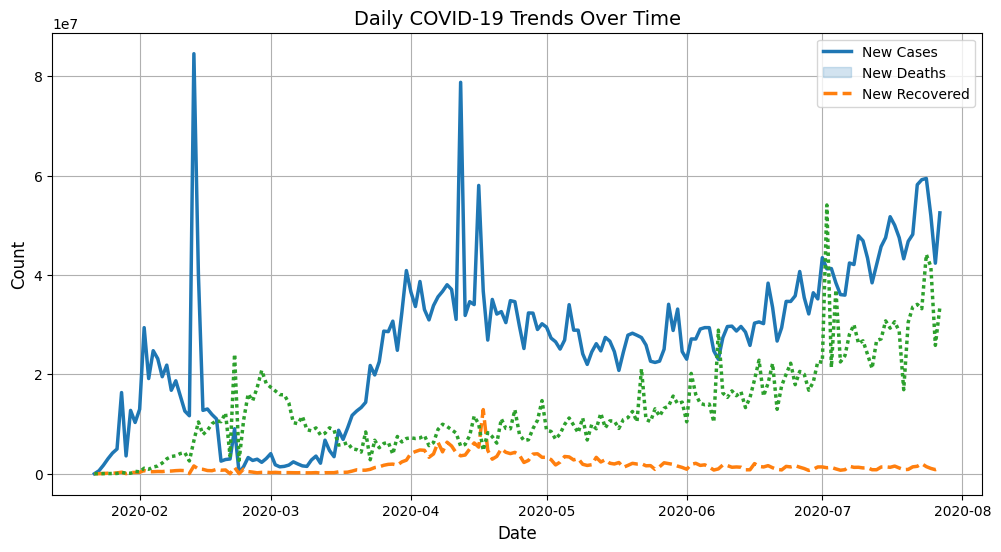

In [50]:
# Group by Date to get global trends
daily_trend = combined_data.groupby('Date')[['New cases_grouped', 'New deaths_grouped', 'New recovered_grouped']].sum()

# Plot trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_trend, linewidth=2.5)

# Formatting
plt.title("Daily COVID-19 Trends Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(["New Cases", "New Deaths", "New Recovered"])
plt.grid(True)

# Show the plot
plt.show()

###### 4.12. Monthly Trend Over Time

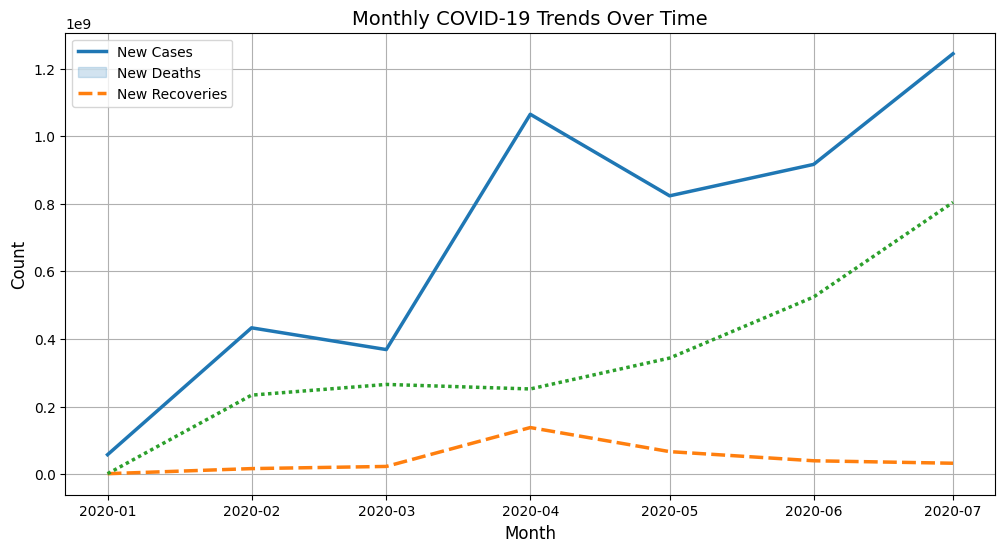

In [51]:
# Create a 'Year-Month' column for grouping
combined_data['Year-Month'] = combined_data['Date'].dt.to_period('M')

# Group by 'Year-Month' to get monthly totals
monthly_trend = combined_data.groupby('Year-Month')[['New cases_grouped', 'New deaths_grouped', 'New recovered_grouped']].sum()

# Convert period index back to datetime for plotting
monthly_trend.index = monthly_trend.index.to_timestamp()

# Plot monthly trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trend, linewidth=2.5)

# Formatting
plt.title("Monthly COVID-19 Trends Over Time", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(["New Cases", "New Deaths", "New Recoveries"])
plt.grid(True)

# Show the plot
plt.show()

### 5. Analysis For Africa

In [52]:
# Filter for Africa
africa_data = combined_data[combined_data['WHO Region'] == 'Africa'].reset_index(drop=True)
africa_data.head()


,Date,Country,Confirmed_grouped,Deaths_grouped,Recovered_grouped,Active_grouped,New cases_grouped,New deaths_grouped,New recovered_grouped,WHO Region,...,Long,Year,Month,Day,Week,Quarter,Mortality Rate %,Recovery Rate %,Active Proportion %,Year-Month
0,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa,...,1.6596,2020,January,Wednesday,4,1,0.0,0.0,0.0,2020-01
1,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa,...,1.6596,2020,January,Wednesday,4,1,0.0,0.0,0.0,2020-01
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa,...,1.6596,2020,January,Wednesday,4,1,0.0,0.0,0.0,2020-01
3,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa,...,1.6596,2020,January,Wednesday,4,1,0.0,0.0,0.0,2020-01
4,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa,...,1.6596,2020,January,Wednesday,4,1,0.0,0.0,0.0,2020-01


In [53]:
africa_data.shape

(1696512, 28)

In [54]:
africa_data['Country'].unique()

array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic',
       'Chad', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Eswatini',
       'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau',
       'Kenya', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mauritius', 'Mozambique', 'Namibia', 'Niger',
       'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal',
       'Seychelles', 'Sierra Leone', 'South Africa', 'South Sudan',
       'Tanzania', 'Togo', 'Uganda', 'Western Sahara', 'Zambia',
       'Zimbabwe'], dtype=object)

###### 5.1. Mortality Rate By Country in Africa

Mortality Rate by Countries in Africa:                      Country  Mortality Rate %
0                    Algeria          6.113336
1                     Gambia          5.955679
2                   Zimbabwe          5.297019
3                    Liberia          5.118942
4                 Mauritania          4.963959
5                     Angola          4.530915
6                       Chad          4.225964
7               Burkina Faso          4.007987
8                       Mali          3.881684
9                      Niger          3.863584
10            Western Sahara          3.510638
11          Congo (Kinshasa)          2.991094
12                    Malawi          2.672027
13                  Tanzania          2.668055
14                  Botswana          2.634474
15                Cabo Verde          2.516590
16                      Togo          2.485123
17       Congo (Brazzaville)          2.393071
18              Sierra Leone          2.392562
19                   

Text(0, 0.5, 'Mortality Rate (%)')

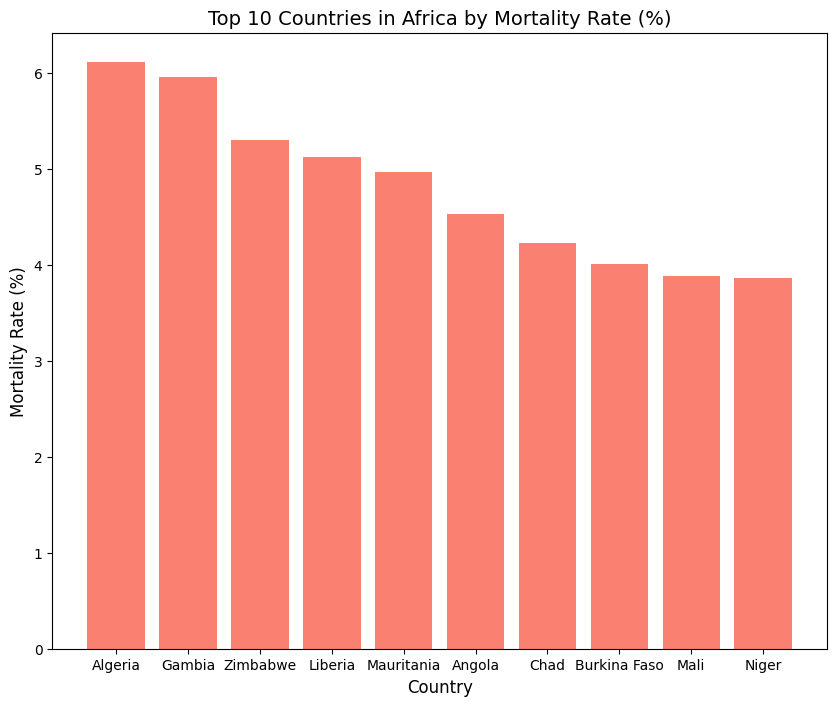

In [55]:
# KPI
# Mortality Rate by Countries in Africa
mortality_rate_africa = africa_data.groupby('Country')[['Mortality Rate %']].agg('mean').reset_index()

# Sort by mortality rate
top10_countries_africa = mortality_rate_africa.nlargest(10, 'Mortality Rate %')
african_countries = mortality_rate_africa.nlargest(47, 'Mortality Rate %').set_index(pd.Index(range(len(mortality_rate_africa.nlargest(47, 'Mortality Rate %')))))
print(f"Mortality Rate by Countries in Africa: {african_countries}")

# Insight
plt.figure(figsize=(10, 8))
plt.bar(top10_countries_africa['Country'], top10_countries_africa['Mortality Rate %'], color='salmon')
plt.title ('Top 10 Countries in Africa by Mortality Rate (%)', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Mortality Rate (%)', fontsize=12)

###### 5.2. Recovery Rate by Countries in Africa

Recovery Rate by Countries in Africa:                      Country  Recovery Rate %
0                  Mauritius        51.566161
1               Burkina Faso        47.475465
2                      Niger        43.489152
3             Western Sahara        41.560284
4                     Zambia        37.072621
5                    Algeria        36.265764
6                    Senegal        35.742049
7                 Seychelles        35.347050
8                       Togo        35.145790
9                       Chad        34.489499
10                    Gambia        33.826662
11                  Cameroon        33.523309
12                   Eritrea        33.508781
13                    Uganda        32.569733
14                    Guinea        31.867133
15                      Mali        31.732071
16                    Rwanda        31.153966
17                   Burundi        29.868198
18             Cote d'Ivoire        27.488001
19              South Africa        26.811

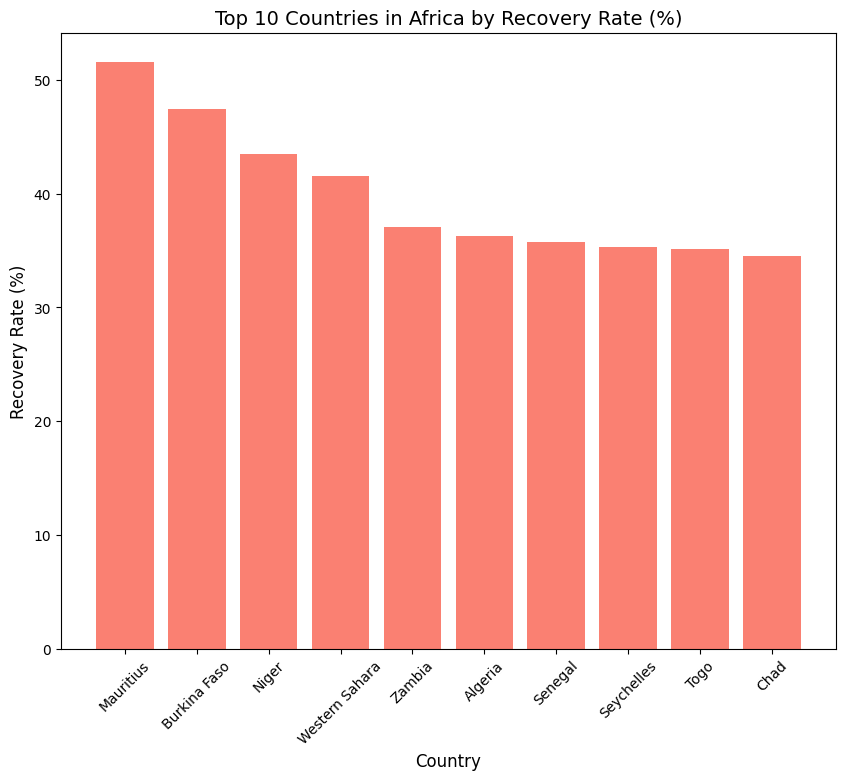

In [56]:
# KPI
# Recovery Rates by Countries in Africa
recovery_rate_africa = africa_data.groupby('Country')[['Recovery Rate %']].agg('mean').reset_index()

# Sort by recovery rate
top10_countries_africa2 = recovery_rate_africa.nlargest(10, 'Recovery Rate %')
african_countries2 = recovery_rate_africa.nlargest(50, 'Recovery Rate %').set_index(pd.Index(range(len(recovery_rate_africa.nlargest(50, 'Recovery Rate %')))))
print(f"Recovery Rate by Countries in Africa: {african_countries2}")

# Insight
plt.figure(figsize=(10, 8))
plt.bar(top10_countries_africa2['Country'], top10_countries_africa2['Recovery Rate %'], color='salmon')
plt.title ('Top 10 Countries in Africa by Recovery Rate (%)', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Recovery Rate (%)', fontsize=12)
x = plt.xticks(rotation=45)


###### 5.3. Confirmed cases by Countries in Africa

Total Confirmed Cases by Countries in Africa:                      Country  Confirmed_grouped
0               South Africa         2099723684
1                    Nigeria          307199520
2                      Ghana          234369072
3                    Algeria          221793940
4                   Cameroon          158825596
5              Cote d'Ivoire          114879656
6                    Senegal           87881916
7                      Kenya           87345364
8           Congo (Kinshasa)           80389552
9                     Guinea           75877740
10                  Ethiopia           67290464
11                     Gabon           62167464
12                Mauritania           41189860
13                Madagascar           38971648
14  Central African Republic           37347892
15         Equatorial Guinea           28812504
16                      Mali           28480872
17                    Zambia           24331148
18             Guinea-Bissau           231

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'South Africa'),
  Text(1, 0, 'Nigeria'),
  Text(2, 0, 'Ghana'),
  Text(3, 0, 'Algeria'),
  Text(4, 0, 'Cameroon'),
  Text(5, 0, "Cote d'Ivoire"),
  Text(6, 0, 'Senegal'),
  Text(7, 0, 'Kenya'),
  Text(8, 0, 'Congo (Kinshasa)'),
  Text(9, 0, 'Guinea')])

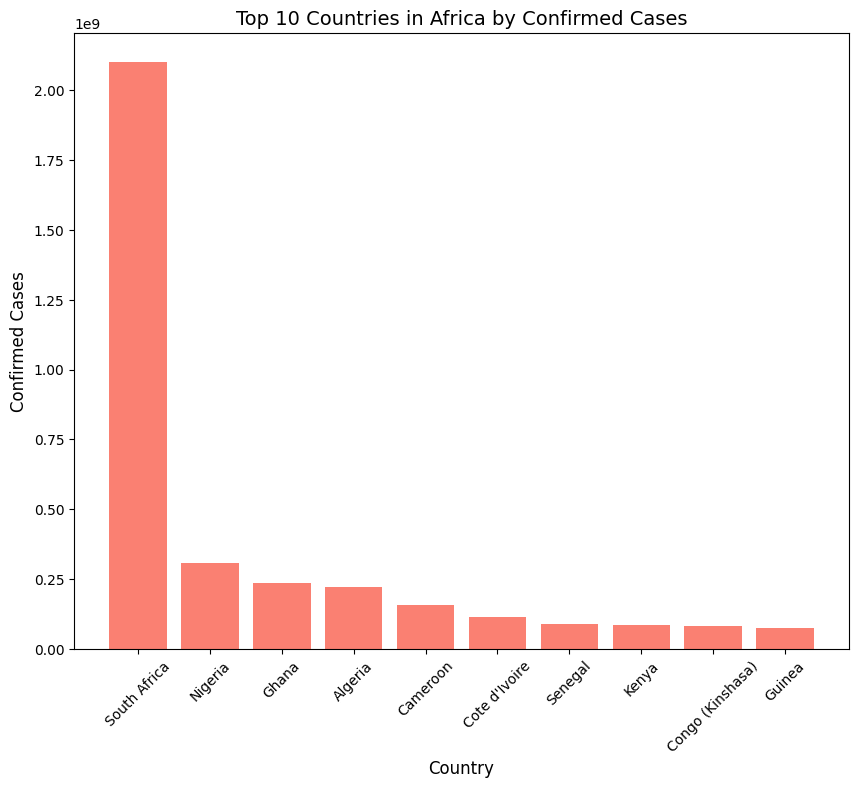

In [57]:
# KPI
# Confirmed cases by Countries in Africa
confirmed_cases_africa = africa_data.groupby('Country')[['Confirmed_grouped']].agg('sum').reset_index()

# sort by confirmed
top10_countries_africa3 = confirmed_cases_africa.nlargest(10, 'Confirmed_grouped')
african_countries3 = confirmed_cases_africa.nlargest(50, 'Confirmed_grouped').set_index(pd.Index(range(len(confirmed_cases_africa.nlargest(50, 'Confirmed_grouped')))))
print(f"Total Confirmed Cases by Countries in Africa: {african_countries3}")

#insight
plt.figure(figsize=(10, 8))
plt.bar(top10_countries_africa3['Country'], top10_countries_africa3['Confirmed_grouped'], color='salmon')
plt.title ('Top 10 Countries in Africa by Confirmed Cases', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Confirmed Cases', fontsize=12)
plt.xticks(rotation=45)

###### 5.4. Trend Analysis Over Time for Africa

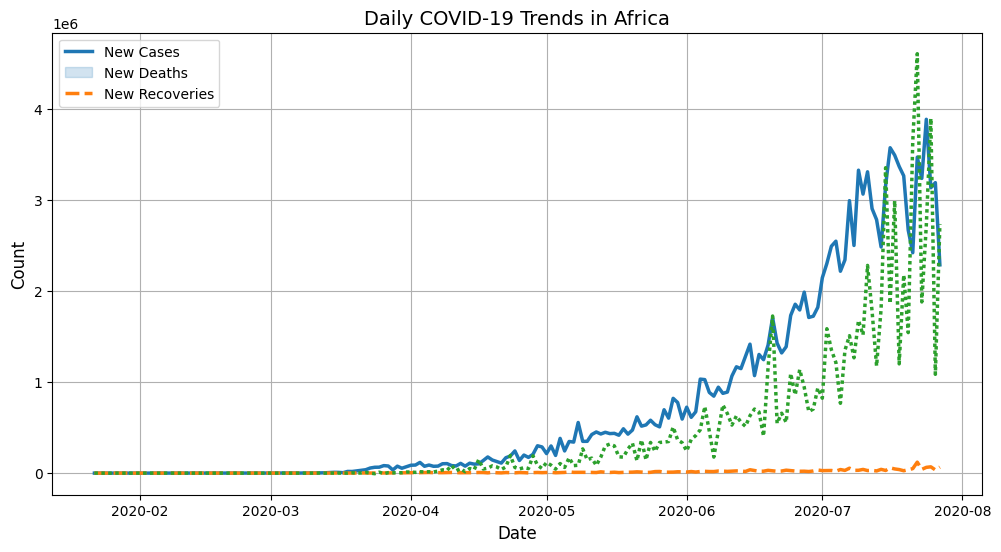

In [58]:
# KPI
# Filter for African countries
combined_data_africa = combined_data[combined_data['WHO Region'] == 'Africa']

# Group by date to calculate daily trends for Africa
africa_daily_trend = combined_data_africa.groupby('Date')[['New cases_grouped', 'New deaths_grouped', 'New recovered_grouped']].sum()

# Plot daily trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=africa_daily_trend, linewidth=2.5)

# Formatting
plt.title("Daily COVID-19 Trends in Africa", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(["New Cases", "New Deaths", "New Recoveries"])
plt.grid(True)

# Show the plot
plt.show()

### 6. Analysis for Nigeria

In [59]:
# Filter for Nigeria
nigeria_data = combined_data[combined_data['Country'] == 'Nigeria']
nigeria_data.head()

,Date,Country,Confirmed_grouped,Deaths_grouped,Recovered_grouped,Active_grouped,New cases_grouped,New deaths_grouped,New recovered_grouped,WHO Region,...,Long,Year,Month,Day,Week,Quarter,Mortality Rate %,Recovery Rate %,Active Proportion %,Year-Month
35344,2020-01-22,Nigeria,0,0,0,0,0,0,0,Africa,...,8.6753,2020,January,Wednesday,4,1,0.0,0.0,0.0,2020-01
35345,2020-01-22,Nigeria,0,0,0,0,0,0,0,Africa,...,8.6753,2020,January,Wednesday,4,1,0.0,0.0,0.0,2020-01
35346,2020-01-22,Nigeria,0,0,0,0,0,0,0,Africa,...,8.6753,2020,January,Wednesday,4,1,0.0,0.0,0.0,2020-01
35347,2020-01-22,Nigeria,0,0,0,0,0,0,0,Africa,...,8.6753,2020,January,Wednesday,4,1,0.0,0.0,0.0,2020-01
35348,2020-01-22,Nigeria,0,0,0,0,0,0,0,Africa,...,8.6753,2020,January,Wednesday,4,1,0.0,0.0,0.0,2020-01


###### 6.1 Trend Analysis Over Time for Nigeria

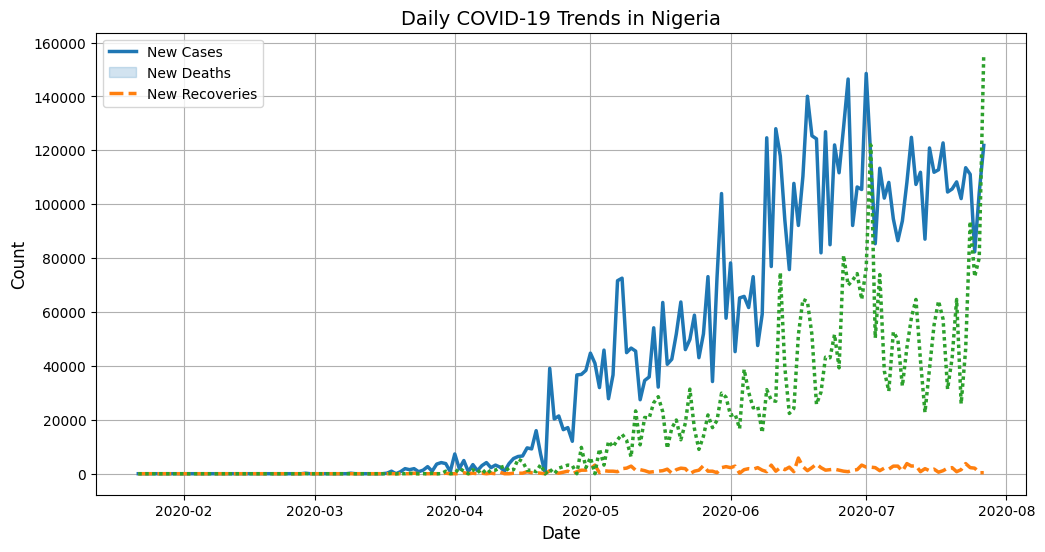

In [60]:
# KPI
# Group by Date to calculate daily trends for Nigeria
nigeria_daily_trend = nigeria_data.groupby('Date')[['New cases_grouped', 'New deaths_grouped', 'New recovered_grouped']].sum()

# Plot daily trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=nigeria_daily_trend, linewidth=2.5)

# Formatting
plt.title("Daily COVID-19 Trends in Nigeria", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(["New Cases", "New Deaths", "New Recoveries"])
plt.grid(True)

# Show the plot
plt.show()

### 7. Building The Model

In [61]:
pip install xgboost

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

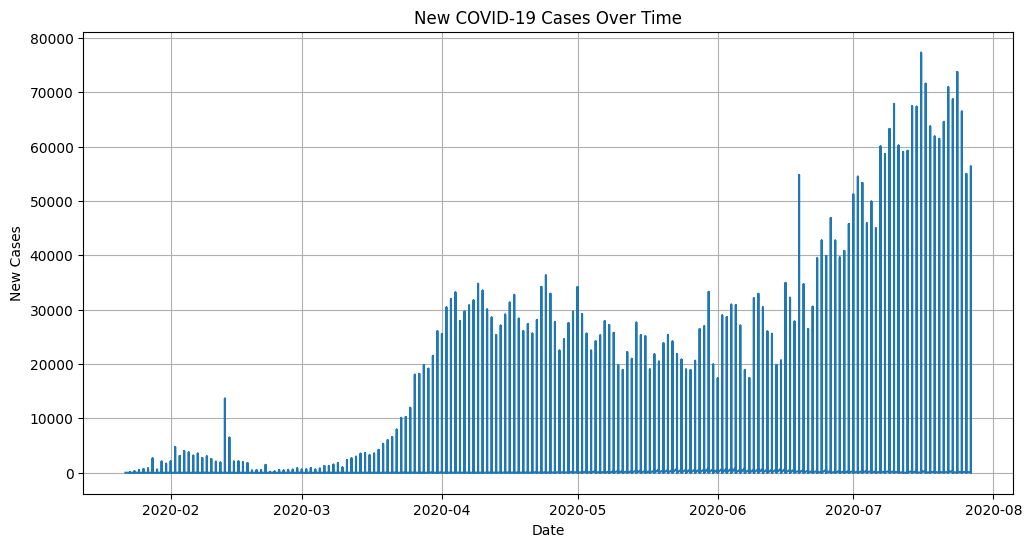

In [63]:
# Set Date as the index
combined_data.set_index('Date', inplace=True)

# Select the relevant column for forecasting
new_cases = combined_data['New cases_grouped']

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(new_cases)
plt.title('New COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.grid(True)
plt.show()



In [64]:
from statsmodels.tsa.stattools import kpss

kpss_result = kpss(combined_data['New cases_grouped'].dropna(), regression='c')
print(f'KPSS Statistic: {kpss_result[0]}')
print(f'p-value: {kpss_result[1]}')


KPSS Statistic: 20.189788985544116
p-value: 0.01


<ipython-input-64-03d90634f46d>:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(combined_data['New cases_grouped'].dropna(), regression='c')


In [65]:
combined_data['New cases_diff'] = combined_data['New cases_grouped'].diff()

# Run KPSS again to check stationarity
from statsmodels.tsa.stattools import kpss

kpss_result_diff = kpss(combined_data['New cases_diff'].dropna(), regression='c')
print(f'KPSS Statistic: {kpss_result_diff[0]}')
print(f'p-value: {kpss_result_diff[1]}')


KPSS Statistic: 1.1649966467377084e-05
p-value: 0.1


<ipython-input-65-fcf9be86fb9e>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result_diff = kpss(combined_data['New cases_diff'].dropna(), regression='c')


In [66]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


In [74]:
# Ensure 'Date' is in datetime format and set as index if not already
# combined_data['Date'] = pd.to_datetime(combined_data['Date']) # This line is causing the error
# combined_data.set_index('Date', inplace=True)                # This line is causing the error

# Since 'Date' is already the index, reset it to a column
combined_data.reset_index(inplace=True)
combined_data['Date'] = pd.to_datetime(combined_data['Date'])
combined_data.set_index('Date', inplace=True)

# Resample the data to weekly frequency and calculate the mean for each week
# Select only numeric columns for the mean calculation
numeric_columns = combined_data.select_dtypes(include=np.number).columns
combined_data_resampled_weekly = combined_data[numeric_columns].resample('W').mean()

# Define the ARIMA model
model = ARIMA(combined_data_resampled_weekly['New cases_grouped'], order=(1, 1, 1))  # Adjust p, d, q as needed

# Fit the model
model_fit = model.fit()

# Print summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:      New cases_grouped   No. Observations:                   28
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -169.373
Date:                Mon, 03 Feb 2025   AIC                            344.745
Time:                        16:57:32   BIC                            348.633
Sample:                    01-26-2020   HQIC                           345.901
                         - 08-02-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3442      0.905      0.380      0.704      -1.429       2.118
ma.L1          0.0709      0.953      0.074      0.941      -1.797       1.939
sigma2      1.635e+04   3876.102      4.217      0.0

###### Discussion

The findings from the above analysis provide insights on the spread of Covid_19 virus among countries/regions and some factors that may be responsible for the spread.
The insights were gotten from some specific KPIs such as Total Confirmed Cases by WHO Region, Total Recovered Cases by WHO Region, Total Active Cases by WHO Region, Total Deaths by WHO Region, Top 10 countries by mortality rate and WHO Regions by Mortality Rate. The Americas exhibited an exceptionary high number in TCC, TAC, TRC and TD which could be attributed to their large population and a robust health care system to cater for the Covid_19 patients.
Yamen, a country in the Eastern Mediterranean Region has a high mortality rate compared to Eastern Mediterranean as a whole which could be attributed to limited health care facilities or scarcity of resources. It can be seen that countries with higher case count have lower mortality rate compared to countries with lower case count.

